# CS530 Homework 6 Part1

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as logreg
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import itertools
plt.style.use('fivethirtyeight') 
%matplotlib inline

#### Question 1. (4 points)

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. Use the scikit-learn package to train a logistic regression model on the training set, train.csv, and predict on the test set, test.csv. The variable that you are predicting is named 'target'. Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.


In [2]:
# Your code goes here.

train = pd.read_csv("train.csv", index_col = 0)
ytrain = train['target']
xtrain = train.drop(['target'], axis = 1)

clf_train = logreg(random_state=0, solver='lbfgs').fit(xtrain, ytrain)

test = pd.read_csv("test.csv", index_col = 0)
xtest = test.drop(['target'], axis = 1)
ytest = test['target']

test_accuracy = round(clf_train.score(xtest,ytest),4)

print("Testing set accuracy is", test_accuracy)

Testing set accuracy is 0.8684


C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

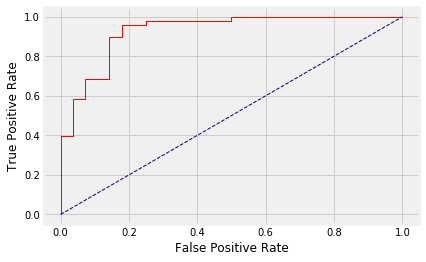

The AUC is 0.9293


In [3]:
# Your code goes here.
ylogprob = clf_train.predict_proba(xtest)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, ylogprob)
auc = metrics.auc(fpr,tpr)

plt.plot(fpr, tpr, 'r-', lw = 1)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("The AUC is",round(auc,4))

c. Implement a function to plot the ROC curve of the model you get from on the test set. (Hints: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

In [6]:
logR = logreg(random_state = 0, solver = 'lbfgs')
logR.fit(xtrain,ytrain)
ypred = logR.predict(xtest)

predict_prob = [i[1] for i in logR.predict_proba(xtest)]

fake_thresholds = np.linspace(0,1,10)

pred_df = pd.DataFrame({'Labels': ytest,
                        'Predicted Probability': predict_prob})

pred_df

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,Labels,Predicted Probability
227,0,0.209641
228,0,0.422666
229,1,0.981840
230,0,0.911411
231,1,0.769289
...,...,...
298,1,0.919905
299,1,0.955510
300,1,0.951541
301,1,0.620182


In [7]:
# As you can see, I tried really hard to make this function but for some reason, it could not run.

In [8]:
def roc_curve(predict_probabilities, thresholds):
    # Separating the labels & predicted probabilities
    labels = predict_probabilities.iloc[:,0].values
    prob = predict_probabilities.iloc[:,1].values
    
    true_positive = 0
    false_negative = 0
    true_negative = 0
    false_positive = 0
    tpr_list = []
    fpr_list = []
    
    for p in prob:
        for (l,t) in zip(labels, thresholds):
            if (l == 1) & (p >= t):
                true_positive += 1   
            if (l == 1) & (p < t):
                false_positive += 1
            if (l == 0) & (p <= t):
                true_negative += 1
            if (l == 0) & (p > t):
                false_negative += 1
    
        tpr = (true_positive) / (true_positive + false_negative)
        fpr = (false_positive)/(true_negative + false_positive)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    #print(tpr_list)
    #print(len(fpr_list))
     
    # Plot ROC curve.  
    plt.figure(figsize = (8,8))
    plt.plot(fpr_list,tpr_list, label= 'ROC Curve')
    plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='baseline', lw = 1, linestyle='--')
    plt.ylabel('TPR', fontsize = 10)
    plt.xlabel('FPR', fontsize = 10)
    plt.legend(fontsize = 10)

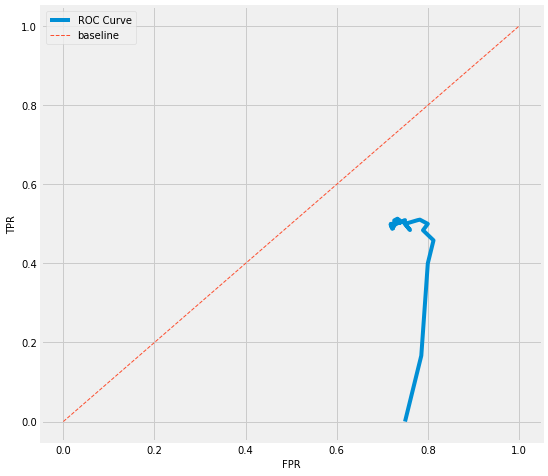

In [9]:
roc_curve(pred_df, fake_thresholds)

#### Question 2 (3 points)

a. Use the same dataset in Question 1 to train a classification model with the LDA algorithm. Give a prediction accuracy on the test set.

In [4]:
# Your code goes here
# LDA accuracy scores on the training + test sets
clf2 = lda()
lda_train = clf2.fit(xtrain,ytrain)
print("The prediction accuracy with LDA on testing set is", round(lda_train.score(xtest,ytest),4))

The prediction accuracy with LDA on testing set is 0.8553


b. Plot the ROC curve of the LDA model you trained in 2a on the test set. You can use the scikit-learn package.

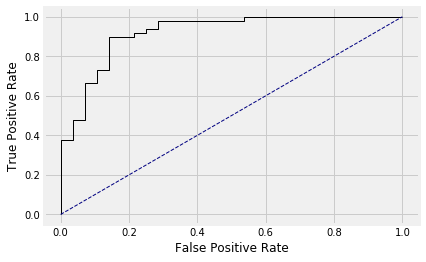

In [5]:
# Your code goes here
# ROC curve of the LDA model on the test set

lda_logprob = lda_train.predict_proba(xtest)[::,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(ytest, lda_logprob)
auc2 = metrics.auc(fpr2,tpr2)

plt.plot(fpr2, tpr2, 'k-', lw = 1)
plt.plot([0, 1], [0, 1], color='navy', lw = 1, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

c. Compare the ROC and accuracy on the test set that you get from Questions 1 and 2. Which algorithm performs better on this dataset? Explain your answer and hypothesize why one algorithm might be better than the other on this dataset.

In [ ]:
# The ROC from Q1 is slightly different than the one in Q2. 
# There seems to be more changes between among the TPR & FPR when using LogReg vs. LDA.
# In terms of the accuracy, performing LDA on the training set results in a lower accuracy score 
# but LDA on the testing set returns the same accuracy. 

In [ ]:
# I think LDA is a better fitted algorithm for this dataset.
# Reason is because LDA is a better method for separability of variables.
# If we are trying to identify whether a patient has a heart disease, it's best if we can clearly separate the variables
# to help the classification process. 